# Vulnerability Evaluation with Unsupervised Learning


Unsupervised learning is a class of machine learning (ML) techniques used to find patterns in data. The data given to unsupervised algorithms is not labelled, which means only the input variables (X) are given with no corresponding output variables. In unsupervised learning, the algorithms are left to discover interesting structures in the data on their own.




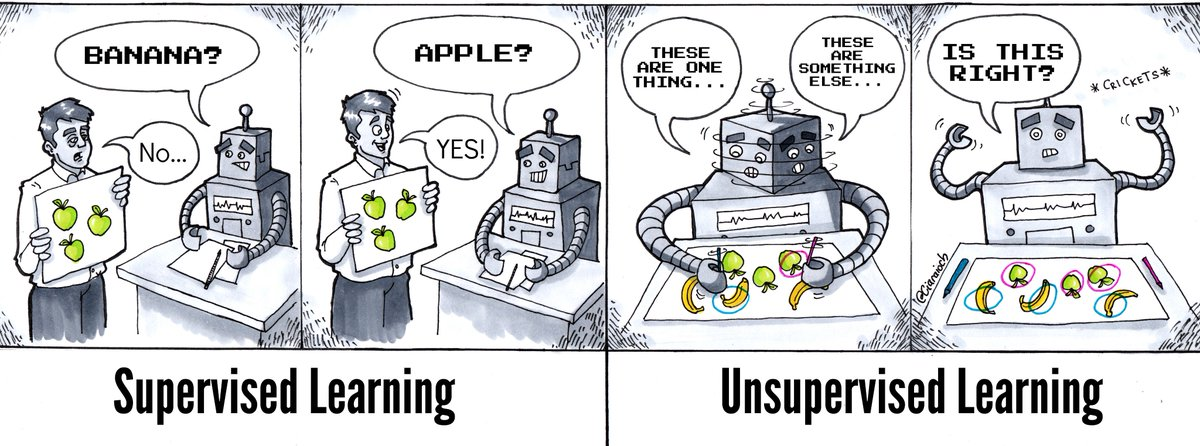

In [1]:
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
# Read it and drop the labels
cvss_data = pd.read_csv('2020cvss.csv')
cvss_data["label"] = (cvss_data["label"] >= 2).astype(int)
labels = cvss_data["label"]
cvss_data = cvss_data.drop("label", axis=1)
cvss_data = cvss_data.drop("Unnamed: 0", axis=1)

In [3]:
cvss_data.head()

,attackVector,attackComplexity,privilegesRequired,userInteraction,confidentialityImpact,integrityImpact,availabilityImpact
0,0.55,0.44,0.62,0.85,0.66,0.66,0.66
1,0.85,0.44,0.85,0.62,0.66,0.66,0.66
2,0.55,0.77,0.62,0.62,0.66,0.66,0.66
3,0.55,0.44,0.62,0.85,0.00,0.00,0.66
4,0.55,0.44,0.27,0.85,0.66,0.66,0.66


# 1 - Train a k-means with 2 clusters for the CVSS dataset.



#### k-Means

Clustering algorithms aim at separating our data into clusters of similar entries. For instance, in our flower dataset, can we cluster the data into three different clusters so that flowers in the same family all fall into the same clusters? Yes, we can use the [k-Means](https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/#:~:text=4.-,K%20Means%20Clustering,points%20in%202%2DD%20space.) algorithm for that.




The k-Means is an iterative clustering algorithm that aims to find the clusters that best aggregate our data in each iteration. The K-means defines clusters using a special point called a **centroid**, that defines what is the center of a cluster. As the name suggests, k-Means tries to find $k$ centroids, or means, and assigns entries to each cluster based on the closest centroid. The number of centroids $k$ is a input of the algorithm that we have to choose ourselves.

Let's see the k-means in practice with a simple example. Let's assume that we have the five data points below and that we want to cluster them. The k-Means finds the clusters following these 6 steps.


1- Define the number of clusters k, let's use $k = 2$

2- Randomly assign each data point to a cluster

3- Compute cluster centroids

4- Re-assign each point to the closest cluster centroid

5- Re-compute cluster centroids.

6- Repeat steps 4 and 5 until no improvements are possible, that is, when there are no further switching of data points between two clusters.

In [4]:
# Declaring Model
model = KMeans(n_clusters=2, random_state=42)

# Fitting Model
model.fit(cvss_data.values)

KMeans(n_clusters=2, random_state=42)

In [5]:
# Predicitng a single input
fake_cvss = [[0.55,0.44,0.62,0.85,0.66,0.66,0.66]] 
predicted_label = model.predict(fake_cvss) 
print('Our fake cvss belongs to the cluster =', predicted_label[0])

Our fake cvss belongs to the cluster = 0


In [6]:
# Predicitng a single input
fake_cvss = [[0.55,0.44,0.62,0.85,0.00,0.00,0.66]] 
predicted_label = model.predict(fake_cvss) 
print('Our fake cvss belongs to the cluster =', predicted_label[0])

Our fake cvss belongs to the cluster = 1


Which cluster do each of our cvss belong?

In [22]:
# Prediction on the entire data
all_predictions = model.predict(cvss_data.values)

# Printing Predictions
print(all_predictions)

[0 0 0 ... 0 1 0]


# 2 - Apply a PCA with 2 principal components in the features of the CVSS dataset.

In [23]:
# Plotting 2D
X = [cvss_data['attackVector']]
Y = cvss_data.values

target_names = ['cluster 0', 'cluster 1']

pca = PCA(n_components=2) #selecting number of dimensions
X_r = pca.fit(Y).transform(Y) 

# 3 - Plot the results of the PCA with the color of each point representing the cluster that the k-means gave to it. 

In [24]:
X_r

array([[-0.47507188, -0.0239763 ],
       [-0.43461941, -0.02723974],
       [-0.46723326, -0.03795518],
       ...,
       [-0.46106267, -0.02710067],
       [ 0.37969022, -0.32928039],
       [-0.46106267, -0.02710067]])

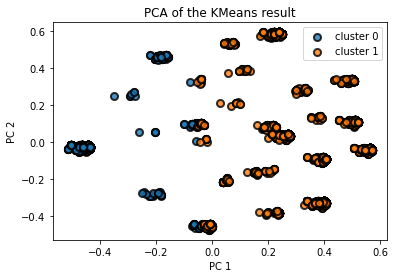

In [26]:
for i, target_name in zip([0, 1], target_names):
    plt.scatter(all_predictions == i, 0], X_r[all_predictions == i, 1], alpha=.8, lw=2, edgecolor="k", s=50)
    plt.legend(target_names)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title('PCA of the KMeans result')
plt.show()

In [57]:
d = [x for x in X_r[all_predictions == 0]]
b = [x for x in X_r[all_predictions == 1]]
c = d + b

In [58]:
len(c)

14315

# 4 - Using the severity class of the vulnerabilities as the true label compute the precision, recall, and f1-score of the k-means predictions. 

In [59]:
print(classification_report(all_predictions, c))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

predictions score:

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      6267
           1       0.00      0.00      0.00      8048
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
       

/home/gimpel/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
